# Titanic Survival Analysis

<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Titanic-Cobh-Harbour-1912.JPG"/ width=500/>

We want to examine survival rates on the RMS Titanic, and more importantly, who was it that survived? Given that we want to know the **features** that contributed to one's survival on that fateful shipwreck, **decision trees** seem quite suited to this purpose.

Let's take a look at some of the variables in the dataset.

------

**VARIABLE DESCRIPTIONS:**
* survival   -     Survival
                (0 = No; 1 = Yes)
* pclass     -     Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
* name       -     Name
* sex        -     Sex
* age        -     Age
* sibsp      -     Number of Siblings/Spouses Aboard
* parch      -     Number of Parents/Children Aboard
* ticket     -     Ticket Number
* fare       -     Passenger Fare
* cabin      -     Cabin
* embarked   -     Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [1]:
# Standard imports
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

# Imports to allow us to write to io and view images in ipython
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

In [2]:
#path_to_repo = "/Users/brianchung/Desktop/ga-ds/"
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


--------
If you watch "disaster" based movies, one thing they always say is "Take the women and children first!" Let's see how true that is. 

Does being a woman and/or child help in having survived the titanic crash?

In [4]:
X = pd.DataFrame({'Age': data.Age.replace([np.NaN],data.Age.median(method='drop')),
                  'Sex': data.Sex.apply(lambda x: 1 if x=="male" else 0)})
y = data.Survived

In [5]:
X = X[ ~y.isnull() ]
y = y[ ~y.isnull() ]

0.796857463524 [ 0.  1.]
[ 0.13377044  0.86622956]


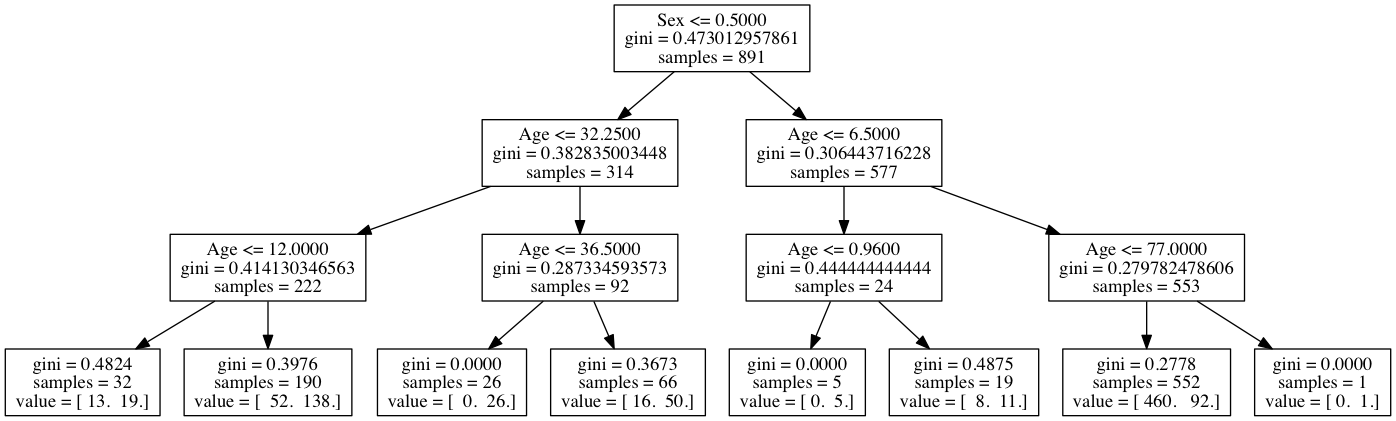

In [6]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X,y)
print model.score(X,y), model.classes_
print model.feature_importances_

# Write a decision tree to a stringIO buffer using tree.export_graphviz
dot_data = StringIO()
tree.export_graphviz(model,out_file=dot_data,feature_names=["Age","Sex"])

# From the stringio, create a graph and output to screen
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



In [7]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

np.mean(cross_val_score( tree.DecisionTreeClassifier(),X,y,scoring="roc_auc",cv=KFold(len(X),n_folds=10,shuffle=True)))

0.77193400754636021

Seems it was not a good time to have that Y chromosome.

------
# Exercise

Try improving upon the decision tree score for roc_auc. Recall that the roc_auc (Receiver Operating Characteristic Area under the curve) can be used as a metric in binary classification problems.

One feature that might help improve the score is the "Pclass" metric. Perhaps the rich were shuttled off the boat first? Report your scores using Decision trees, and what factors were most important in determining survival.

In [68]:
X = pd.DataFrame({'Age': data.Age.replace([np.NaN],data.Age.median(method='drop')),
                  'Sex': data.Sex.apply(lambda x: 1 if x=="male" else 0), 
                  'Pclass': data.Pclass, 
                  'Fare': data.Fare.replace([np.NaN],data.Fare.mean(method='drop'))})
m = X.median['Fare' > 0]
X['Fare' == 0] = m
y = data.Survived

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [64]:
X = X[ ~y.isnull() ]
y = y[ ~y.isnull() ]

0.821548821549 [ 0.  1.]
[ 0.06349701  0.05214007  0.2389131   0.64544982]


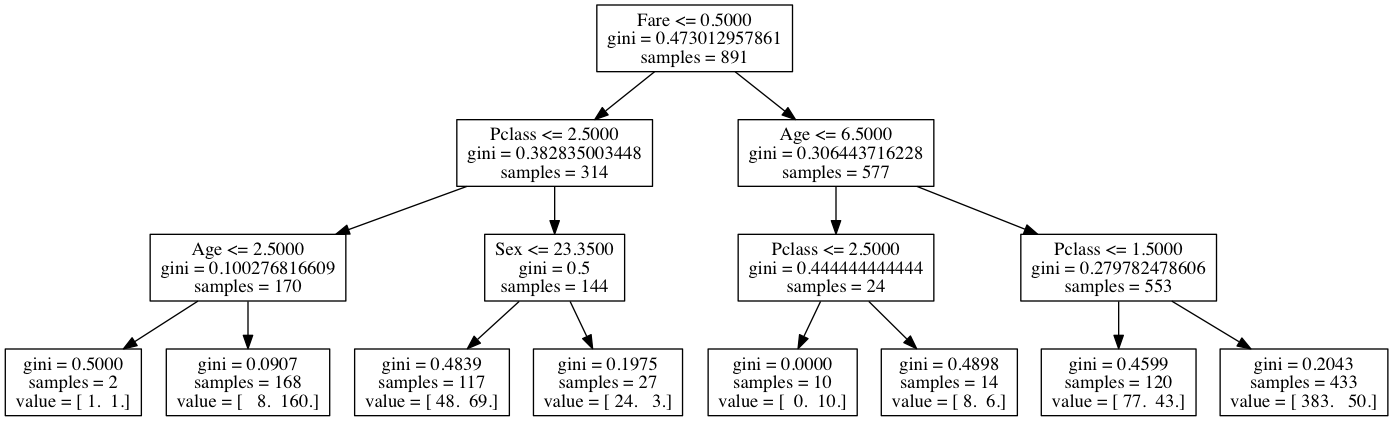

In [65]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X,y)
print model.score(X,y), model.classes_
print model.feature_importances_

# Write a decision tree to a stringIO buffer using tree.export_graphviz
dot_data = StringIO()
tree.export_graphviz(model,out_file=dot_data,feature_names=["Age","Sex","Pclass","Fare"])

# From the stringio, create a graph and output to screen
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

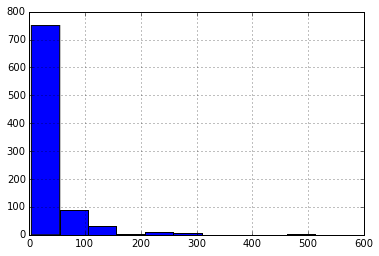

In [62]:
X['Fare'].hist()